# Libraries

In [60]:
import pickle
import pandas as pd
import seaborn as sns
from collections import Counter
import re
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading the Files

Download the csv files into the `data/` directory.

In [61]:
#mainTrainingSet = pd.read_csv("./data/train.csv")

In [62]:
# def create_subset_file(output_file, num_lines=500000):
#     # Read the CSV file

#     # Check if the DataFrame has at least `num_lines` rows
#     if len(mainTrainingSet) < num_lines:
#         num_lines = len(mainTrainingSet)

#     # Select the first `num_lines` rows
#     subset_df = mainTrainingSet.head(num_lines)

#     # Save the subset to a new CSV file
#     subset_df.to_csv(output_file, index=False)
#     print(f"Created {output_file} with the first {num_lines} lines.")

# # Example usage
# output_file_path = "./data/cuttrain.csv"
# create_subset_file(output_file_path)

In [63]:
# import pandas as pd

# def undersample_data(df, target_column='Score'):
#     # Find the minimum count of samples for any non-empty class
#     value_counts = df[target_column].value_counts()
#     min_count = value_counts[value_counts > 0].min()
    
#     # Create an empty list to store undersampled data
#     undersampled_list = []
    
#     # Loop through each unique score and sample `min_count` reviews
#     for score in df[target_column].unique():
#         score_reviews = df[df[target_column] == score]
        
#         # Only sample if the score class is not empty
#         if len(score_reviews) >= min_count:
#             undersampled_reviews = score_reviews.sample(n=min_count, random_state=42)
#             undersampled_list.append(undersampled_reviews)
    
#     # Concatenate all undersampled reviews into a single DataFrame
#     undersampled_df = pd.concat(undersampled_list, ignore_index=True)
    
#     return undersampled_df

# # Example usage
# balanced_df = undersample_data(mainTrainingSet, target_column='Score')
# print(balanced_df['Score'].value_counts())

# # Save the undersampled dataset to a CSV file
# balanced_df.to_csv('./data/cuttrain.csv', index=False)


cuttrain.csv shape is  (448390, 9)
test.csv shape is  (212192, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   849388  B0002XVKMC  A1EYS0SF2CWUQJ                     3   
1   643839  B00005JOY9  A3EW4F5K3P0XA4                     0   
2   168859  1404974725  A2HWLC7ISWYNTI                     0   
3  1518032  B006OFN052  A1D3BMPIUZ8V34                     0   
4  1268348  B002GYHIYE   A5LNJ2CVLXFK3                     0   

   HelpfulnessDenominator        Time               Summary  \
0                       8  1149811200     The Final Season!   
1                       0  1393286400             great buy   
2                       0  1358121600  Absolutely Fantastic   
3                       0  1332115200      it was as stated   
4                       0  1391904000                   DVD   

                                                Text  Score  
0  "Buffy" is my favorite TV show of all time and...    5.0  
1  i bought this movie because i was buying 1

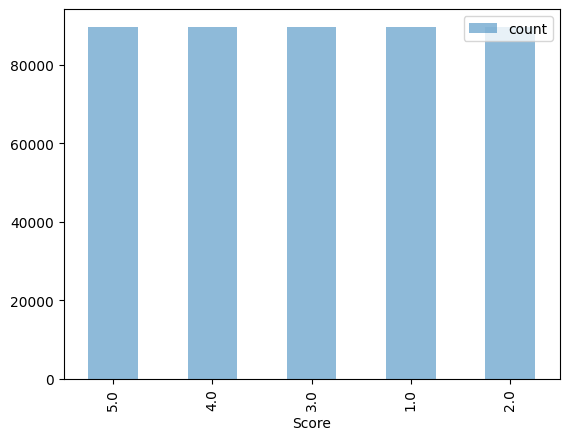


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [64]:
trainingSet = pd.read_csv("./data/cuttrain.csv")
testingSet = pd.read_csv("./data/test.csv")

print("cuttrain.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

In [65]:
# Function to get the top words by rating
def get_top_words_by_rating(df, star_rating, stop_words=None, top_n=1000):
    # If stop_words is None, initialize it as an empty list
    if stop_words is None:
        stop_words = []
    
    # Filter DataFrame by the specified star rating
    filtered_df = df[df['Score'] == star_rating]
    
    # Combine all the texts for the specified rating into one string
    combined_text = ' '.join(filtered_df['Text'].fillna(''))
    
    # Tokenize the text: remove punctuation and split into words
    words = re.findall(r'\b\w+\b', combined_text.lower())
    
    # Remove stop words
    filtered_words = [word for word in words if word not in stop_words]
    
    # Count the frequency of each word
    word_counts = Counter(filtered_words)
    
    # Get the top N most common words
    most_common_words = word_counts.most_common(top_n)
    
    # Convert the words into a set
    top_words_set = set([word for word, freq in most_common_words])
    
    return top_words_set

# Function to get all words by rating
def get_all_words_by_rating(df, star_rating, stop_words=None):
    # If stop_words is None, initialize it as an empty list
    if stop_words is None:
        stop_words = []
    
    # Filter DataFrame by the specified star rating
    filtered_df = df[df['Score'] == star_rating]
    
    # Combine all the texts for the specified rating into one string
    combined_text = ' '.join(filtered_df['Text'].fillna(''))
    
    # Tokenize the text: remove punctuation and split into words
    words = re.findall(r'\b\w+\b', combined_text.lower())
    
    # Remove stop words
    filtered_words = [word for word in words if word not in stop_words]
    
    # Count the frequency of each word
    word_counts = Counter(filtered_words)
    
    # Convert all words into a set (for uniqueness)
    all_words_set = set(filtered_words)
    
    return all_words_set
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him',
    'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its',
    'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what',
    'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am',
    'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has',
    'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the',
    'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while',
    'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below',
    'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
    'under', 'again', 'further', 'then', 'once', 'here', 'there',
    'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
    'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's',
    't', 'can', 'will', 'just', 'don', 'should', 'now',
    'say', 'says', 'said', 'say', 'tell', 'told', 'could', 'would',
    'should', 'might', 'must', 'shall', 'may', 'like', 'as', 'into',
    'over', 'after', 'before', 'up', 'down', 'again', 'out', 'since',
    'while', 'where', 'yet', 'so', 'because', 'that',
    'if', 'whether', 'whether', 'both', 'either', 'neither', 'each',
    'few', 'less', 'least', 'most', 'much', 'more', 'many', 'nobody',
    'somebody', 'everybody', 'anybody', 'noone', 'nothing', 'everything',
    'anything', 'one', 'two', 'three', 'first', 'second', 'third',
    'next', 'last', 'same', 'different', 'much', 'more', 'less', 'least',
    'either', 'neither', 'either', 'nor', 'whether', 'whoever', 'whomever', 
    'whatever', 'whichever', 'whatsoever',
    'the', 'and', 'is', 'in', 'to', 'of', 'it', 'a', 'that', 'this', 
    'for', 'with', 's', 'as', 'was', 'you', 'movie', 'on', 'but', 
    'are', 'his', 'her', 'one', 'film', 'he', 'she', 'have', 'all', 
    'not', 't', 'be', 'by', 'from', 'who', 'an', 'they', 'so', 
    'at', 'my', 'has', 'there', 'if', 'about', 'out', 'or', 'just', 'will', 
    'movies', 'films', 'story', 'dvd', 'time', 'people'
]


top_words_5 = get_top_words_by_rating(trainingSet, star_rating=5, stop_words=stop_words)
top_words_4 = get_top_words_by_rating(trainingSet, star_rating=4, stop_words=stop_words)
top_words_3 = get_top_words_by_rating(trainingSet, star_rating=3, stop_words=stop_words)
top_words_2 = get_top_words_by_rating(trainingSet, star_rating=2, stop_words=stop_words)
top_words_1 = get_top_words_by_rating(trainingSet, star_rating=1, stop_words=stop_words)

words_5 = get_all_words_by_rating(trainingSet, star_rating=5, stop_words=stop_words)
words_4 = get_all_words_by_rating(trainingSet, star_rating=4, stop_words=stop_words)
words_3 = get_all_words_by_rating(trainingSet, star_rating=3, stop_words=stop_words)
words_2 = get_all_words_by_rating(trainingSet, star_rating=2, stop_words=stop_words)
words_1 = get_all_words_by_rating(trainingSet, star_rating=1, stop_words=stop_words)

# Calculate common words using set intersections
common_words = set()

# For each combination, find common words and add to the common_words set
common_words.update(words_5.intersection(words_1, words_2, words_3))
common_words.update(words_4.intersection(words_2, words_1))
common_words.update(words_3.intersection(words_5, words_1))
common_words.update(words_2.intersection(words_5, words_4))
common_words.update(words_1.intersection(words_3, words_4, words_5))

unique_words_5 = words_5 - common_words
unique_words_4 = words_4 - common_words
unique_words_3 = words_3 - common_words
unique_words_2 = words_2 - common_words
unique_words_1 = words_1 - common_words

# Print arrays of unique words for each rating
print("Top words for rating 5:", top_words_5)
print()
print("Top words for rating 4:", top_words_4)
print()
print("Top words for rating 3:", top_words_3)
print()
print("Top words for rating 2:", top_words_2)
print()
print("Top words for rating 1:", top_words_1)

Top words for rating 5: {'masterpiece', 'portrayal', 'power', 'york', 'scenes', 'o', 'level', 'contains', 'details', 'adventure', 'name', 'every', 'friend', 'idea', 'reality', 'mother', 'history', 'christmas', 'older', 'believable', 'includes', 'ship', 'sister', 'seven', 'sweet', 'perfectly', 'went', 'century', 'act', 'believe', 'taken', 'seemed', 'without', 'works', 'whose', 'actual', 'quite', 'today', 'eyes', '8', 'match', 'call', 'important', 'brought', 'involved', 'enjoy', 'unique', 'romance', 'thought', 'super', 'still', 'cute', 'local', 'mention', 'particular', 'director', 'roles', 'social', 'house', 'money', 'episode', 'using', 'feel', 'american', 'beauty', 'oscar', 'fine', 'yes', 'political', 'however', 'know', 'vhs', 'seen', 'control', 'long', 'gone', 'admit', 'character', 'vs', 'richard', 'season', 'move', 'far', 'understand', 'figure', 'form', 'already', 'award', 'violent', 'keeps', 'came', 'single', 'main', 'picture', 'words', 'amazing', 'eye', 'leaves', 'similar', 'player'

# Adding Features

In [67]:
def add_features_to(df):
    # This is where you can do all your feature extraction

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    positive_keywords = [
    'masterpiece', 'brilliant', 'captivating', 'outstanding', 'incredible', 
    'amazing', 'wonderful', 'fantastic', 'excellent', 'thrilling', 
    'heartwarming', 'emotional', 'beautiful', 'inspiring', 'highly recommend', 
    'love', 'enjoyed', 'great acting', 'superb', 'top-notch', 
    'excellent direction', 'fantastic cinematography', 'wonderful cast', 
    'best film', 'unique', 'entertaining', 'addictive', 'remarkable',
    'hilarious', 'engaging', 'touching', 'exceptional', 'funny',
    'memorable', 'powerful', 'incredible story', 'fantabulous', 
    'impressive', 'solid', 'riveting', 'spectacular', 'captivated',
    'perfectly executed', 'gripping', 'refreshing', 'classy', 'timeless'
    ]   
    negative_keywords = [
    'disappointing', 'awful', 'terrible', 'horrible', 'boring', 
    'predictable', 'bad', 'waste of time', 'poorly made', 'unoriginal', 
    'failed', 'worst', 'lackluster', 'painful to watch', 'ridiculous', 
    'confusing', 'miserable', 'dull', 'forgettable', 'underwhelming', 
    'weak', 'clumsy', 'forced', 'annoying', 'laughable', 
    'unpleasant', 'cheap', 'offensive', 'clichéd', 'hated',
    'not worth', 'strained', 'long-winded', 'silly', 'messy',
    'suffers from', 'exhausting', 'unbelievable', 'shallow', 'overrated',
    'stale', 'poor execution', 'incoherent', 'painful', 'disjointed',
    'pretentious'
    ]

    def calculate_sentiment(text, positive_keywords, negative_keywords):
        if isinstance(text, str):  # Ensure text is a string
            text = text.lower()  # Normalize the text to lower case
            happy_count = sum([text.count(word) for word in positive_keywords])
            sad_count = sum([text.count(word) for word in negative_keywords])
            sentiment_score = happy_count - sad_count
            return sentiment_score
        else:
            return 0  # Return 0 or any other default value for non-string types

    df['Text'] = df['Text'].astype(str)

    # Apply the function to the 'Text' column to create a new feature
    df['SentimentScore'] = df['Text'].apply(calculate_sentiment, args=(positive_keywords, negative_keywords))
    df['SentimentScore'] = df['SentimentScore'].fillna(0)

    # Common words for 5-star reviews
    common_words_star_5 = unique_words_5

    # Common words for 4-star reviews
    common_words_star_4 = unique_words_4

    # Common words for 3-star reviews
    common_words_star_3 = unique_words_3

    # Common words for 2-star reviews
    common_words_star_2 = unique_words_2

    # Common words for 1-star reviews
    common_words_star_1 = unique_words_1

    def calc_common_word_frequency(text, common_words):
        # Convert review to lowercase and split into words
        words = str(text).lower().split() if text is not None else []
        total_count = len(words)  # Total number of words
        
        # Count occurrences of common words
        common_word_count = sum(1 for word in words if word in common_words)
        
        # Calculate frequency
        frequency = common_word_count / total_count if total_count > 0 else 0  # Avoid division by zero
        
        return frequency

    df['Freq_Star_5'] = df['Text'].apply(lambda x: calc_common_word_frequency(x, common_words_star_5))
    df['Freq_Star_4'] = df['Text'].apply(lambda x: calc_common_word_frequency(x, common_words_star_4))
    df['Freq_Star_3'] = df['Text'].apply(lambda x: calc_common_word_frequency(x, common_words_star_3))
    df['Freq_Star_2'] = df['Text'].apply(lambda x: calc_common_word_frequency(x, common_words_star_2))
    df['Freq_Star_1'] = df['Text'].apply(lambda x: calc_common_word_frequency(x, common_words_star_1))
    
    return df

# # Load the feature extracted files if they've already been generated
# if exists('./data/X_train.csv'):
#     X_train = pd.read_csv("./data/X_train.csv")
# if exists('./data/X_submission.csv'):
#     X_submission = pd.read_csv("./data/X_submission.csv")

# else:
#     # Process the DataFrame
#     train = add_features_to(trainingSet)

#     # Merge on Id so that the submission set can have feature columns as well
#     X_submission = pd.merge(train, testingSet, left_on='Id', right_on='Id')
#     X_submission = X_submission.drop(columns=['Score_x'])
#     X_submission = X_submission.rename(columns={'Score_y': 'Score'})

#     # The training set is where the score is not null
#     X_train =  train[train['Score'].notnull()]

#     X_submission.to_csv("./data/X_submission.csv", index=False)
#     X_train.to_csv("./data/X_train.csv", index=False)
    
# Process the DataFrame
train = add_features_to(trainingSet)

# Merge on Id so that the submission set can have feature columns as well
X_submission = pd.merge(train, testingSet, left_on='Id', right_on='Id')
X_submission = X_submission.drop(columns=['Score_x'])
X_submission = X_submission.rename(columns={'Score_y': 'Score'})

# The training set is where the score is not null
X_train =  train[train['Score'].notnull()]

X_submission.to_csv("./data/X_submission.csv", index=False)
X_train.to_csv("./data/X_train.csv", index=False)

# Sample + Split into training and testing set

In [68]:
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Score']),
    X_train['Score'],
    test_size=1/4.0,
    random_state=0
)

# Feature Selection

In [69]:
features = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 
            'Helpfulness', 'Freq_Star_1', 'Freq_Star_2', 'Freq_Star_3',
            'Freq_Star_4', 'Freq_Star_5', 'SentimentScore']

# features = ['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time', 
#             'Helpfulness', 'Freq_Star_3']

X_train_select = X_train[features]
X_test_select = X_test[features]
X_submission_select = X_submission[features]

# Model Creation

In [70]:
# Learn the model
model = KNeighborsClassifier(n_neighbors=3).fit(X_train_select, Y_train)

# Predict the score using the model
Y_test_predictions = model.predict(X_test_select)

# Model Evaluation

Accuracy on testing set =  0.29864939606415813


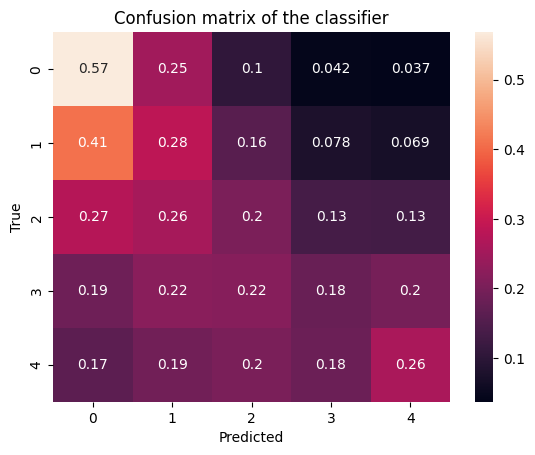

In [73]:
# Evaluate your model on the testing set
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

# Plot a confusion matrix
cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [60]:
# Create the submission file
X_submission['Score'] = model.predict(X_submission_select)
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)